# Q学習

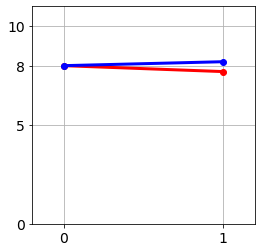

In [13]:
# 図5-1　本書での記載はなし

import matplotlib.pyplot as plt

V = 8
next_V1 = 0.9 * V + 0.1 * 5
next_V2 = 0.9 * V + 0.1 * 10

x0 = -0.2
x1 = 1.2
plt.figure(figsize=(4, 4))
plt.plot([0, 1], [V, next_V1], color='r', marker='o', lw=3)
plt.plot([0, 1], [V, next_V2], color='b', marker='o', lw=3)
plt.ylim(0, 11)
plt.xlim(x0, x1)
plt.xticks([0, 1])
plt.yticks([0, 5, 8, 10])
plt.grid(axis='both')
plt.show()


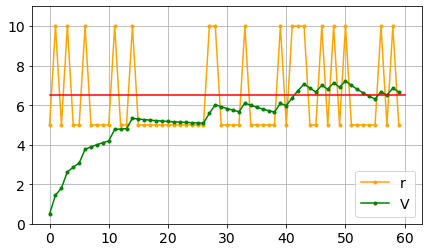

In [14]:
# list 5-1-(1) 報酬期待値の推定

import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)
plt.rcParams['font.size'] = 14              # フォントサイズを設定
plt.rcParams['figure.figsize'] = (7, 4)     # フィギュアサイズ指定

np.random.seed(5)             # 乱数の固定 (A)
initV = 0                     # Vの初期値 (B)
P = 0.7                       # r=5 となる確率 (C)
trueV = 5 * P + 10 * (1 - P)  # 正しいV値 6.5 (D)
n_step = 60                   # ステップ数
history_V = []                # Vの履歴の記録用
history_r = []                # rの履歴の記録用
V = initV                     # Vに初期値を設定

for t in range(n_step):       # ループの開始
    if np.random.rand() < P:  # 確率PでTrueになる(E)
        r = 5                 # Pの確率で実行(F)
    else:
        r = 10                # 1-Pの確率で実行(G)
   
    V = 0.9 * V + 0.1 * r     # 式(5-2)の更新則 (H)
    history_V.append(V)       # Vの履歴を記録
    history_r.append(r)       # rの履歴を記録

# 表示 (I)
plt.plot(history_r, '.-', color='orange', label='r')
plt.plot(history_V, '.-', color='g', label='V')
plt.plot([0, n_step], [trueV, trueV], 'r-')
plt.grid(axis='both')
plt.legend()
plt.ylim(0, 11)
plt.show()


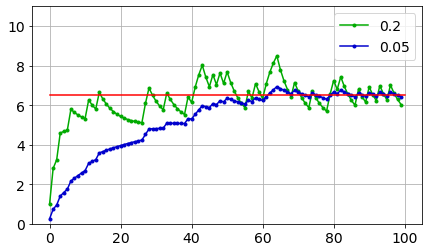

In [15]:
# list 5-1-(2) 学習率とVの関係

initV = 0                         # Vの初期値
P = 0.7                           # r=5 となる確率
trueV = 5 * P + 10 * (1 - P)      # 正しいV値 6.5
n_step = 100                      # ステップ数
alphas = [0.2, 0.05]              # 調べる学習率の値 (A)
col = ['#0a0', '#00c']            # グラフの色

for i, alpha in enumerate(alphas):  # alphaのループ (B)
    np.random.seed(5)             # 乱数の固定
    history_V = []                # Vの履歴の記録用
    V = initV                     # Vに初期値を設定
    for t in range(n_step):       # ループの開始
        if np.random.rand() < P:  # 確率PでTrueになる
            r = 5                 # Pの確率で実行
        else:
            r = 10                # 1-Pの確率で実行
    
        V = (1-alpha) * V + alpha * r  # 平均の更新則 (C)
        history_V.append(V)       # Vの履歴を記録
    # 表示 
    plt.plot(history_V, '.-', color=col[i], label=alpha)

# 表示
plt.plot([0, n_step], [trueV, trueV], 'r-')
plt.grid(axis='both')
plt.legend()
plt.ylim(0, 11)
plt.show()

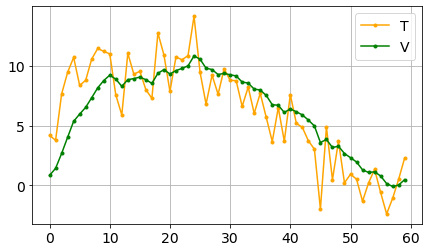

In [18]:
# 図5-4左 本書での記載はなし

import numpy as np
import matplotlib.pyplot as plt

initV = 0                   # Vの初期値
alpha = 0.2
n_step = 60
tt = np.arange(n_step)
T = np.sin(tt*0.08) * 5 + 5
T = T + np.random.randn(n_step) * 2.0

history = []                # Vの履歴の記録用
V = initV                   # Vに初期値を設定
for t in range(n_step):        # ループの開始  
    V = (1-alpha) * V + alpha * T[t] 
    history.append(V)       # Vの履歴を記録

# 表示
plt.plot(T, '.-', color='orange', label='T')
plt.plot(history, '.-', color='g', label='V')
plt.legend()
plt.grid(axis='both')
plt.show()


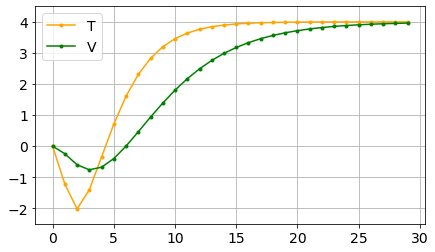

In [19]:
# 図 5-4右　本書での記載はなし

import numpy as np
import matplotlib.pyplot as plt

initV = 0                   # Vの初期値
alpha = 0.2
n_step = 30

tt = np.arange(n_step)
T = - 8 * (tt * np.exp(-0.5*tt)) + (4 - np.exp(-1*tt))
T[0] = 0

history = []                # Vの履歴の記録用
V = initV                   # Vに初期値を設定
for t in range(n_step):        # ループの開始  
    V = (1-alpha) * V + alpha * T[t]
    history.append(V)       # Vの履歴を記録

# 表示
plt.plot(T, '.-', color='orange', label='T')
plt.plot(history, '.-', color='g', label='V')
plt.ylim(-2.5, 4.5)
plt.legend()
plt.grid(axis='both')
plt.show()